In [5]:
from mflex.load.read_file import read_issi_rmhd
import numpy as np
from mflex.plot.plot_magnetogram import plot_fieldlines_grid
from mflex.model.field.bfield_model import magnetic_field
import scipy
import matplotlib.pyplot as plt
from mflex.model.plasma_parameters import (
    bpressure,
    bdensity,
    btemp,
    deltapres,
    deltaden,
    pres,
    den,
    btemp_linear,
    bdensity_linear,
    bpressure_linear,
)
from mflex.evaluate.metrics import (
    vec_corr_metric,
    cau_Schw_metric,
    norm_vec_err_metric,
    mean_vec_err_metric,
    mag_ener_metric,
    field_div_metric,
    pearson_corr_coeff,
)
from mflex.model.field.save import save_field
import matplotlib

--------------------------------------------------
Date: Tue Sep  6 15:18:26 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 10 records of which:
 - 1 are of type NOTICE
 - 1 are of type VERSION
 - 1 are of type TIMESTAMP
 - 6 are of type VARIABLE
--------------------------------------------------
Available variables:
 - b2dx [<class 'numpy.ndarray'>]
 - b2dy [<class 'numpy.ndarray'>]
 - b2dz [<class 'numpy.ndarray'>]
 - info_unit [<class 'bytes'>]
 - info_pixel [<class 'bytes'>]
 - info_array [<class 'bytes'>]
--------------------------------------------------
b'b2d: magnetic vector (Gauss)'
b'Pixel size: 192km*192km'
b'Array example: b2dx(nx,ny)'
xmax, ymax, zmax 98.304 49.152 41.6
xmax_Mm, ymax_Mm, zmax_Mm 98.304 49.152 41.6
nresol_x, nresol_y, nresol_z 512 256 650
pixelsize_x, pixelsize_x_Mm 0.192 0.192
pixelsi

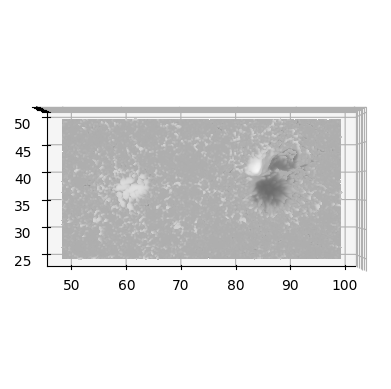

Bz z=0 Maximum 3227.2979
Bz z=0 Minimum -3081.8796


In [11]:
# data = read_issi_rmhd("data/RMHD_boundary_data.sav")
L = 1.0
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dimgray", "whitesmoke"])

data = read_issi_rmhd("data/RMHD_boundary_data.sav", L)
# BFieldvec_Seehafer = np.load('field_data_potential.npy')

data_bx = data.data_x
data_by = data.data_y
data_bz = data.data_z
nresol_x = data.nresol_x
nresol_y = data.nresol_y
nresol_z = data.nresol_z
pixelsize_x = data.pixelsize_x
pixelsize_y = data.pixelsize_y
pixelsize_z = data.pixelsize_z
nf_max = data.nf_max
xmin = data.xmin
xmax = data.xmax
ymin = data.ymin
ymax = data.ymax
zmin = data.zmin
zmax = data.zmax
z0 = data.z0

deltaz = z0 / 10.0  # z0 at 2Mm so width of transition region = 200km
print("z0, deltaz", z0, deltaz)

x_arr = np.arange(2 * nresol_x) * (xmax - xmin) / (2 * nresol_x - 1) + xmin
y_arr = np.arange(2 * nresol_y) * (ymax - ymin) / (2 * nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    data_bz,
    1000,
    #offset=0.0,
    cmap=cmap,
)
ax.view_init(90, -90)
ax.set_box_aspect((xmax, ymax, zmax))
ax.set_zticklabels([])
plt.show()

print("Bz z=0 Maximum", data_bz.max())
print("Bz z=0 Minimum", data_bz.min())

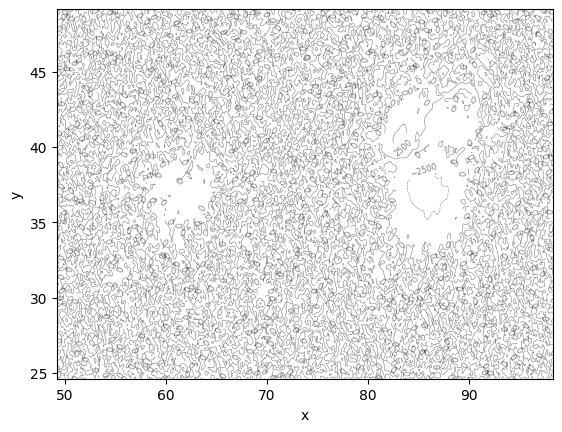

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    data_bz,
    2,
    colors="k",
    linewidths=0.4,
    alpha=0.5
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=6, inline=True)
plt.show()

In [17]:
z0_b = z0
deltaz_b = deltaz
a = 0.01
alpha = 0.01
b = 1.0

"""bfield, dpartial_bfield = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a,
    b,
    alpha,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
)"""


'bfield, dpartial_bfield = magnetic_field(\n    data_bz,\n    z0_b,\n    deltaz_b,\n    a,\n    b,\n    alpha,\n    xmin,\n    xmax,\n    ymin,\n    ymax,\n    zmin,\n    zmax,\n    nresol_x,\n    nresol_y,\n    nresol_z,\n    pixelsize_x,\n    pixelsize_y,\n    nf_max,\n    L,\n)'

In [4]:
#save_field(bfield, dpartial_bfield, "issi_rmhd_" + str(a) + "_" + str(alpha) + "_" + str(b))

In [18]:
bfield = np.load("/Users/lilli/Desktop/mflex/results/issi_rmhd_0.01_0.01_1.0_bfield3d.npy")
dpartial_bfield = np.load("/Users/lilli/Desktop/mflex/results/issi_rmhd_0.01_0.01_1.0_dbzdxdydz3d.npy")

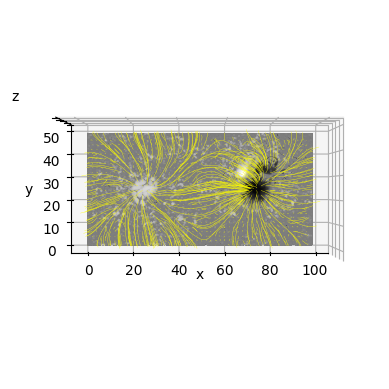

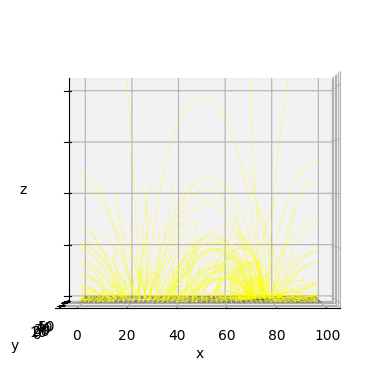

In [19]:
h1 = L / 100.0  # Initial step length for fieldline3D
eps = 1.0e-8
# Tolerance to which we require point on field line known for fieldline3D
hmin = 0.0  # Minimum step length for fieldline3D
hmax = L  # Maximum step length for fieldline3D

plot_fieldlines_grid(
    bfield,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    nf_max,
    stepsize=2.0,
    view="top",
)

plot_fieldlines_grid(
    bfield,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    nf_max,
    stepsize=2.0,
    view="side",
)

In [7]:
t_photosphere = 6000.0
t_corona = 1500000.0
t_z0 = 10000.0
t0 = (t_photosphere + t_corona * np.tanh(z0 / deltaz)) / (1.0 + np.tanh(z0 / deltaz))
t1 = (t_corona - t_photosphere) / (1.0 + np.tanh(z0 / deltaz))

g_solar = 272.2
kB = 1.380649 * 10**-23  # Boltzmann constant in Joule/ Kelvin = kg m^2/(Ks^2)
mbar = 1.67262 * 10**-27  # mean molecular weight (proton mass)
h = (
    kB * t0 / (mbar * g_solar) * 10**-6 * 10**-1 * L**-1
)  # pressure scale height in 10^4 km (10**-6 to convert to Mm, and 10**-1 to convert to 10Mm = 10^4 km)
rho0 = 2.7 * 10**-4  # plasma density at z = 0 in kg/m^3
b0 = 3227.2979  # Gauss background magnetic field strength in 10^-4 kg/(s^2A) = 10^-4 T
p0 = t_photosphere * kB * rho0 / mbar  # plasma pressure in kg/(s^2 m)
mu0 = 1.25663706 * 10**-6  # permeability of free space in mkg/(s^2A^2)
pB0 = (b0 * 10**-4) ** 2 / (2 * mu0)  # magnetic pressure b0**2 / 2mu0 in kg/(s^2m)
beta0 = p0 / pB0  # Plasma Beta, ration plasma to magnetic pressure
h_photo = h / t0 * t_photosphere

--------------------------------------------------
Date: Tue Sep  6 15:19:40 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 12 records of which:
 - 1 are of type NOTICE
 - 8 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - b3dx [<class 'numpy.ndarray'>]
 - b3dy [<class 'numpy.ndarray'>]
 - b3dz [<class 'numpy.ndarray'>]
 - d3d [<class 'numpy.ndarray'>]
 - p3d [<class 'numpy.ndarray'>]
 - info_unit [<class 'bytes'>]
 - info_pixel [<class 'bytes'>]
 - info_array [<class 'bytes'>]
--------------------------------------------------
b'Array example: d3d(nx,ny,nz)'


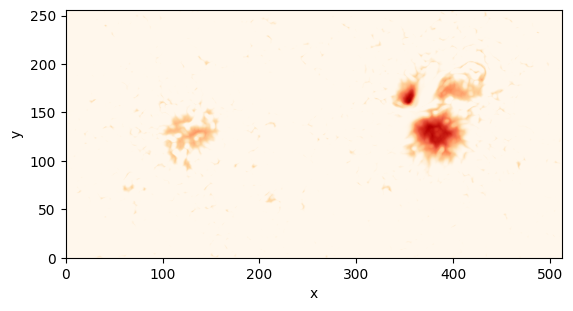

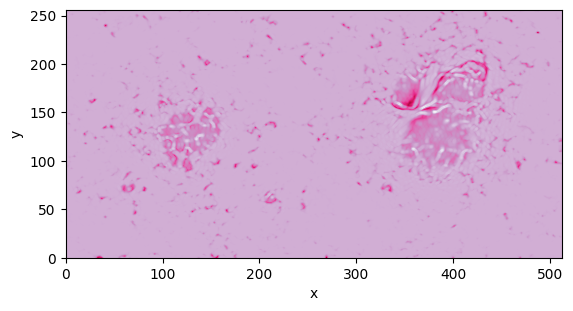

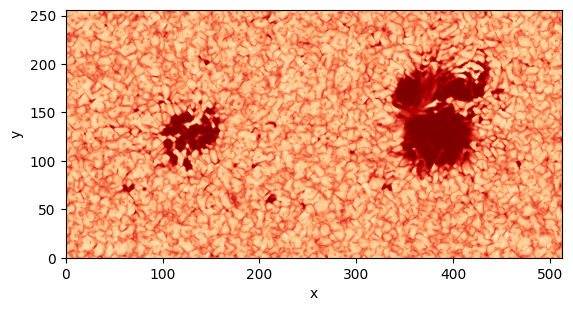

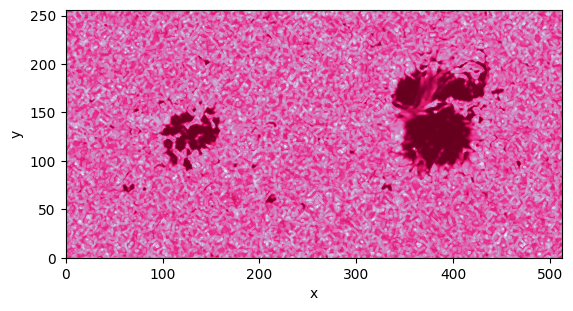

Pressure minimum lin -678.4624500144841
Pressure minimum lin 44838952
Density minimum lin -4.732298761475553e-06
Density minimum lin 53145953
Pressure minimum issi 0.011467607
Pressure minimum issi 8348393
Density minimum issi 1.944082e-19
Density minimum issi 7518648


In [8]:
path3d = "data/RMHD_3D_data.sav"
data3d = scipy.io.readsav(path3d, python_dict=True, verbose=True)

print(data3d["info_array"])

data_bx = data3d["b3dx"]
data_by = data3d["b3dy"]
data_bz = data3d["b3dz"]

pres_3d = data3d["p3d"]
den_3d = data3d["d3d"]

temps = np.array((6000.0, 5500.0, 10000.0, 500000.0, 1000000.0, 1500000.0))
heights = np.array((0.0, 0.5, 2.0, 2.2, 5.0, 100.0))

x_arr = np.arange(nresol_x) * (nresol_x) / (nresol_x - 1)
y_arr = np.arange(nresol_y) * (nresol_y) / (nresol_y - 1)
x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

fpres_lin = np.zeros((nresol_y, nresol_x, nresol_z))
fden_lin = np.zeros((nresol_y, nresol_x, nresol_z))

for iz in range(nresol_z):
    for ix in range(nresol_x):
        for iy in range(nresol_y):
            z = z_arr[iz]
            bz = bfield[nresol_y + iy, nresol_x + ix, iz, 2]
            bzdotgradbz = (
                dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 1]
                * bfield[nresol_y + iy, nresol_x + ix, iz, 1]
                + dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 0]
                * bfield[nresol_y + iy, nresol_x + ix, iz, 0]
                + dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 2]
                * bfield[nresol_y + iy, nresol_x + ix, iz, 2]
            )
            fpres_lin[iy, ix, iz] = (
                b0**2.0
                / mu0
                * 0.5
                * beta0
                * bpressure_linear(z, temps, heights, t0, h)
                * 10**-8
                + deltapres(z, z0_b, deltaz_b, a, b, bz) / mu0 * 10**-8
            )
            fden_lin[iy, ix, iz] = (
                0.5
                * beta0
                / h
                * t0
                / t_photosphere
                * b0**2.0
                / (mu0 * g_solar * L)
                * 10**-14
                * bdensity_linear(z, temps, heights, t0, h, t_photosphere)
                + deltaden(z, z0_b, deltaz_b, a, b, bz, bzdotgradbz)
                / (mu0 * g_solar)
                * 10**-14
            )

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, fpres_lin[:, :, 0], 1000, cmap="OrRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, fden_lin[:, :, 0], 1000, cmap="PuRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()

"""fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, fpres[:, :, 0], 1000, cmap="OrRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, fden[:, :, 0], 1000, cmap="PuRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()"""

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, pres_3d[0, :, :], 1000, cmap="OrRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, den_3d[0, :, :], 1000, cmap="PuRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()

"""fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(
    y_plot, x_plot, fpres_lin[:, :, 0] - pres_3d[0, :, :], 1000, cmap="bone"
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(
    y_plot, x_plot, fden_lin[:, :, 0] - den_3d[0, :, :], 1000, cmap="bone"
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()"""

print("Pressure minimum lin", fpres_lin.min())
print("Pressure minimum lin", fpres_lin.argmin())
print("Density minimum lin", fden_lin.min())
print("Density minimum lin", fden_lin.argmin())


print("Pressure minimum issi", pres_3d.min())
print("Pressure minimum issi", pres_3d.argmin())
print("Density minimum issi", den_3d.min())
print("Density minimum issi", den_3d.argmin())

In [9]:
print(data_bx.shape)
print(data_by.shape)
print(data_bz.shape)

bfield_bx = bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, :, 1]
bfield_by = bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, :, 0]
bfield_bz = bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, :, 2]
print(bfield_bx.shape)
print(bfield_by.shape)
print(bfield_bz.shape)

issi_bx = 0.0 * bfield_bx
issi_by = 0.0 * bfield_by
issi_bz = 0.0 * bfield_bz

for i in range(0, nresol_y):
    for j in range(0, nresol_x):
        for k in range(0, 156):
            issi_bx[i, j, k] = data_bx[k, i, j]
            issi_by[i, j, k] = data_by[k, i, j]
            issi_bz[i, j, k] = data_bz[k, i, j]

B_rec = np.array((bfield_by, bfield_bx, bfield_bz))
B_ref = np.array((issi_by, issi_bx, issi_bz))

print("Vec Corr", vec_corr_metric(B_ref, B_rec))
print("Ref", vec_corr_metric(B_ref, B_ref))
print("Cau Schw", cau_Schw_metric(B_ref, B_rec))
print("Ref", cau_Schw_metric(B_ref, B_ref))
print("Norm err", norm_vec_err_metric(B_ref, B_rec))
print("Ref", norm_vec_err_metric(B_ref, B_ref))
print("Mean err", mean_vec_err_metric(B_ref, B_rec))
print("Ref", mean_vec_err_metric(B_ref, B_ref))
print("Mag ener", mag_ener_metric(B_ref, B_rec))
print("Ref", mag_ener_metric(B_ref, B_ref))

(652, 256, 512)
(652, 256, 512)
(652, 256, 512)
(256, 512, 650)
(256, 512, 650)
(256, 512, 650)
Vec Corr 0.8559083255893833
Ref 1.0


/Users/lilli/Desktop/mflex/mflex/evaluate/metrics.py:32: RuntimeWarning: divide by zero encountered in reciprocal
  div = np.reciprocal(np.multiply(abs(B), abs(b)))
/Users/lilli/Desktop/mflex/mflex/evaluate/metrics.py:33: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.multiply(num, div)) / N


Cau Schw nan
Ref nan
Norm err 0.9105270314240812
Ref 0.0


/Users/lilli/Desktop/mflex/mflex/evaluate/metrics.py:57: RuntimeWarning: divide by zero encountered in reciprocal
  div = abs(np.reciprocal(B))


Mean err inf


/Users/lilli/Desktop/mflex/mflex/evaluate/metrics.py:59: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.multiply(num, div)) / N


Ref nan
Mag ener 2.205504586635383
Ref 1.0


In [12]:
B_ref_See = 0.0 * bfield
print(B_ref_See.shape)
print(B_ref.shape)

for iz in range(0, nresol_z-2):
    for ix in range(0, nresol_x):
        for iy in range(0, nresol_y):
            for id in range(0, 3):
                B_ref_See[nresol_y + iy, nresol_x + ix, iz, id] = B_ref[id, iy, ix, iz]
                B_ref_See[nresol_y + iy, ix, iz, id] = -B_ref[
                    id, iy, nresol_x - 1 - ix, iz
                ]
                B_ref_See[iy, nresol_x + ix, iz, id] = -B_ref[
                    id, nresol_y - 1 - iy, ix, iz
                ]
                B_ref_See[iy, ix, iz, id] = B_ref[
                    id, nresol_y - 1 - iy, nresol_x - 1 - ix, iz
                ]

plot_fieldlines_grid(
    B_ref_See,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    nf_max,
    stepsize=2.0,
    view="top",
)

plot_fieldlines_grid(
    B_ref_See,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    nf_max,
    stepsize=2.0,
    view="side",
)

print(
    "Field line",
    field_div_metric(
        B_ref_See,
        bfield,
        h1,
        hmin,
        hmax,
        eps,
        nresol_x,
        nresol_y,
        nresol_z,
        -xmax,
        xmax,
        -ymax,
        ymax,
        zmin,
        zmax,
        stepsize=2.0,
    ),
)
print(
    "Ref",
    field_div_metric(
        B_ref_See,
        B_ref_See,
        h1,
        hmin,
        hmax,
        eps,
        nresol_x,
        nresol_y,
        nresol_z,
        -xmax,
        xmax,
        -ymax,
        ymax,
        zmin,
        zmax,
        stepsize=2.0,
    ),
)

(512, 1024, 650, 3)
(3, 256, 512, 650)


KeyboardInterrupt: 

In [11]:
pres_surface_ref, den_surface_ref, pres_surface_rec, den_surface_rec = (
    pearson_corr_coeff(
        pres_3d[0:650, :, :],
        den_3d[0:650, :, :],
        fpres_lin,
        fden_lin,
        nresol_x,
        nresol_y,
        nresol_z,
        zmin,
        zmax,
    )
)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, pres_surface_ref, 1000, cmap="bone")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, den_surface_ref, 1000, cmap="bone")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, pres_surface_rec, 1000, cmap="bone")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, den_surface_rec, 1000, cmap="bone")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

ValueError: operands could not be broadcast together with shapes (649,) (255,) 